In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR-Employee-Attrition.csv to HR-Employee-Attrition.csv


In [ ]:
# Load the dataset
df = pd.read_csv('HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# Remove columns that are not needed
columns_to_remove = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']  # Replace with actual redundant columns
df.drop(columns=columns_to_remove, inplace=True)

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Remove rows with NaN values
df.dropna(inplace=True)

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

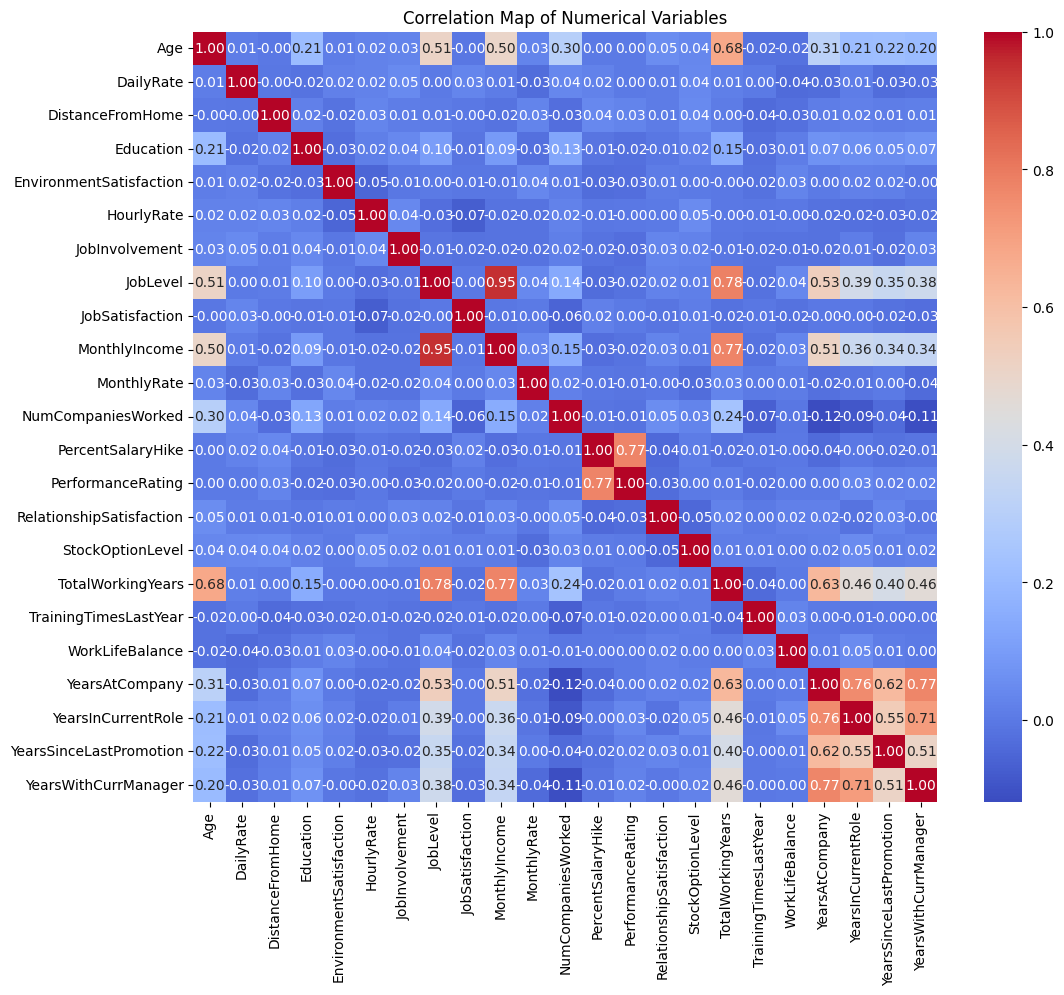

In [ ]:
# Plot correlation map for numerical variables
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Map of Numerical Variables')
plt.show()

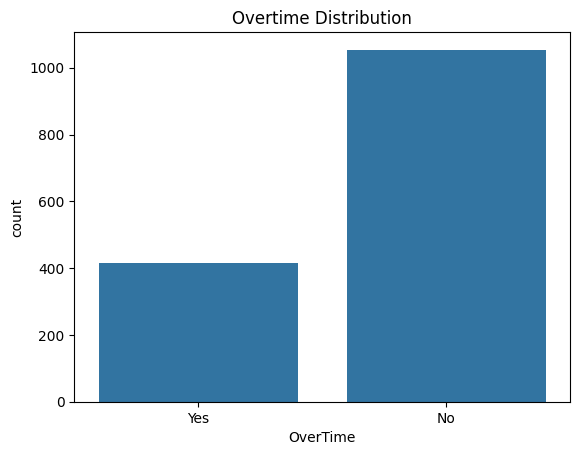

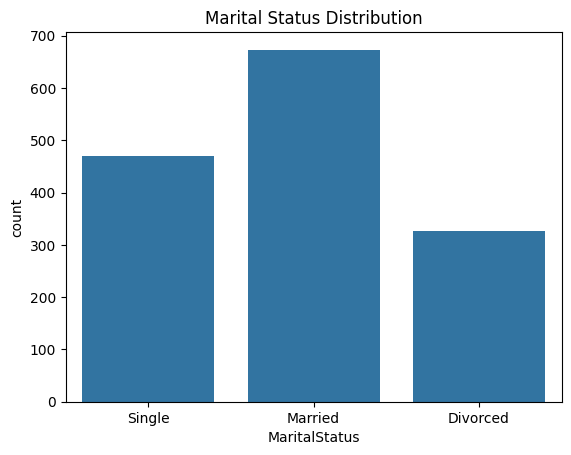

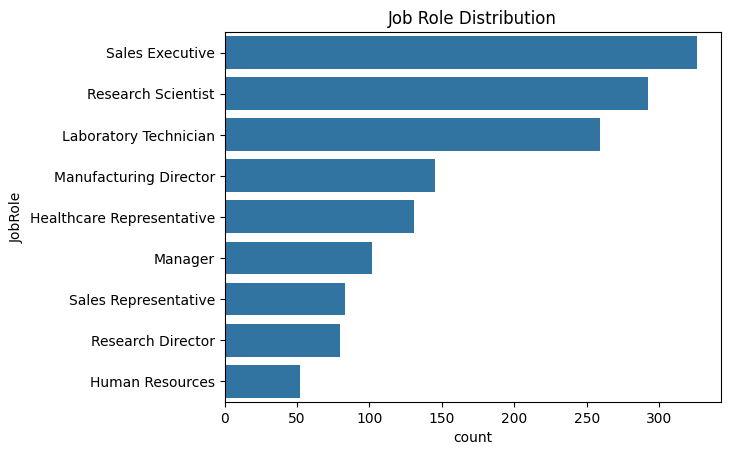

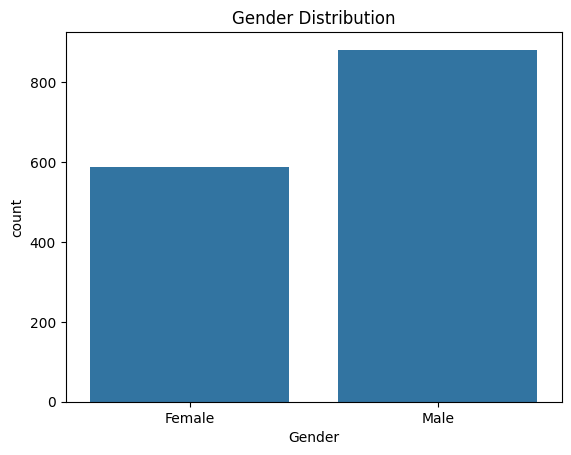

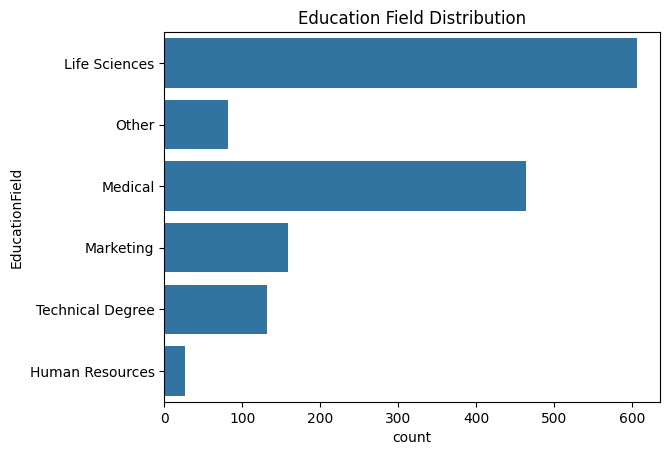

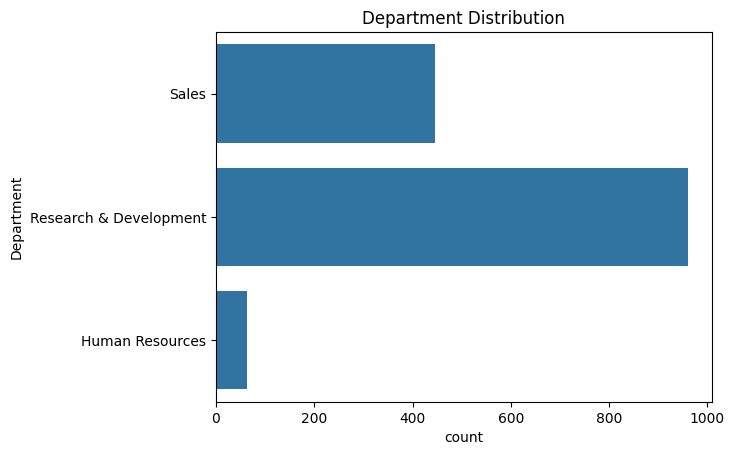

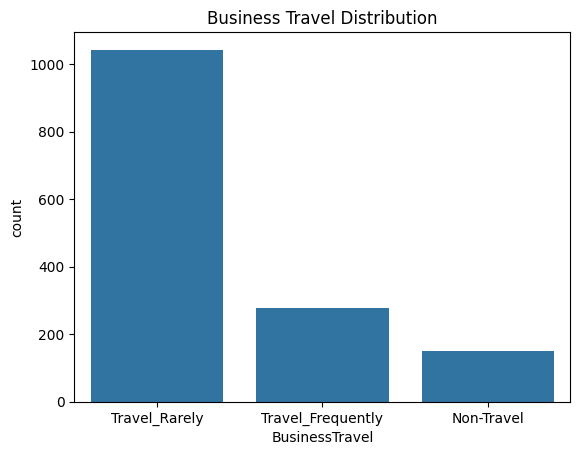

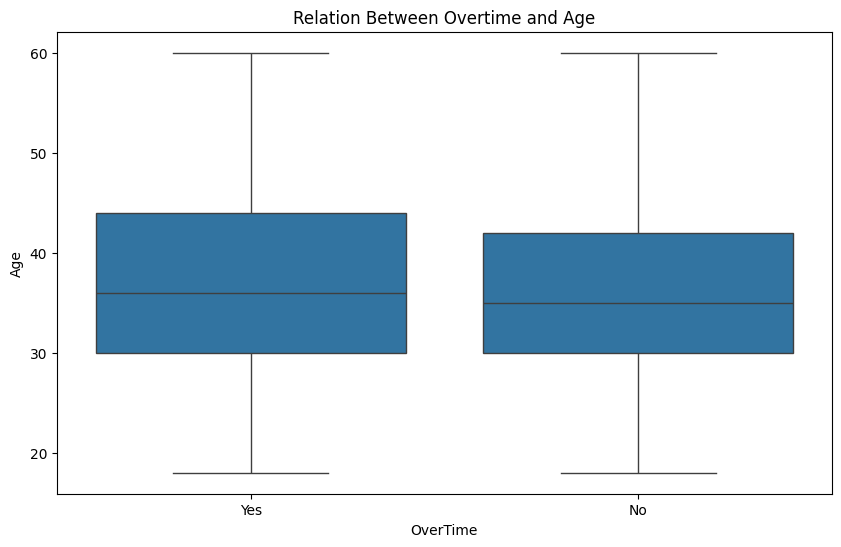

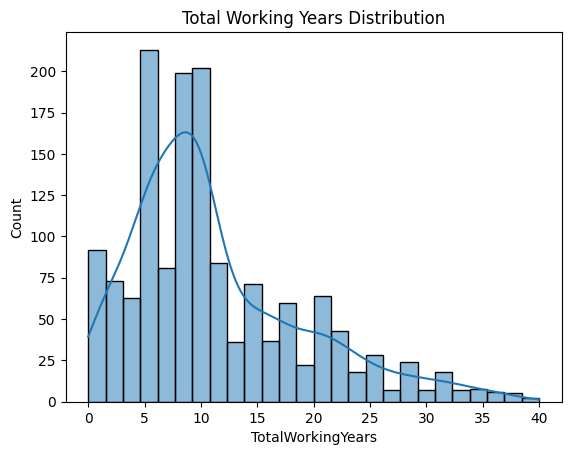

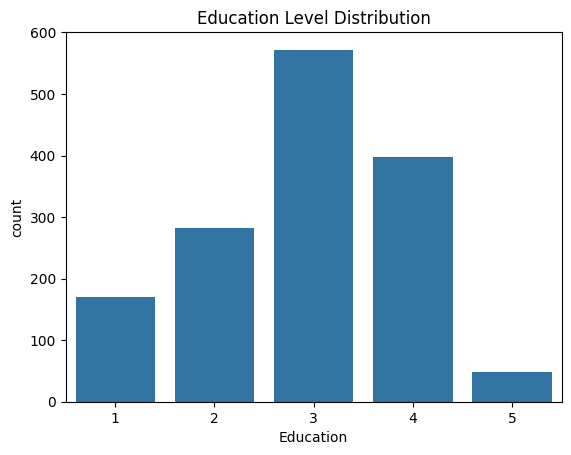

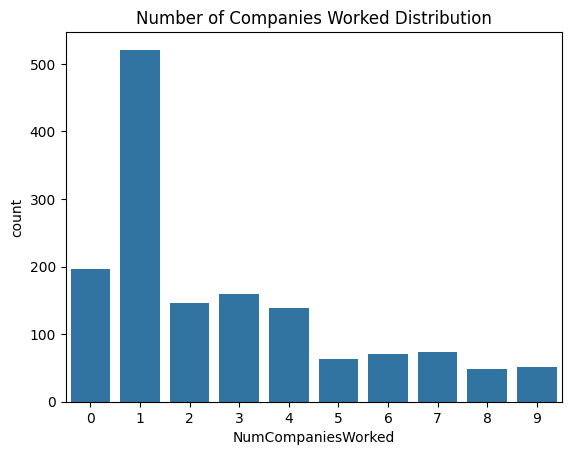

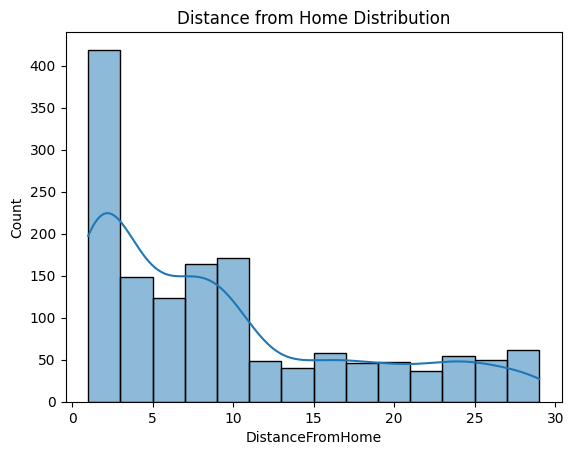

In [ ]:
# Overtime Distribution
sns.countplot(x='OverTime', data=df)
plt.title('Overtime Distribution')
plt.show()

# Marital Status Distribution
sns.countplot(x='MaritalStatus', data=df)
plt.title('Marital Status Distribution')
plt.show()

# Job Role Distribution
sns.countplot(y='JobRole', data=df)
plt.title('Job Role Distribution')
plt.show()

# Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Education Field Distribution
sns.countplot(y='EducationField', data=df)
plt.title('Education Field Distribution')
plt.show()

# Department Distribution
sns.countplot(y='Department', data=df)
plt.title('Department Distribution')
plt.show()

# Business Travel Distribution
sns.countplot(x='BusinessTravel', data=df)
plt.title('Business Travel Distribution')
plt.show()

# Relation Between Overtime and Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverTime', y='Age', data=df)
plt.title('Relation Between Overtime and Age')
plt.show()

# Total Working Years Distribution
sns.histplot(df['TotalWorkingYears'], kde=True)
plt.title('Total Working Years Distribution')
plt.show()

# Education Level Distribution
sns.countplot(x='Education', data=df)
plt.title('Education Level Distribution')
plt.show()

# Number of Companies Worked Distribution
sns.countplot(x='NumCompaniesWorked', data=df)
plt.title('Number of Companies Worked Distribution')
plt.show()

# Distance from Home Distribution
sns.histplot(df['DistanceFromHome'], kde=True)
plt.title('Distance from Home Distribution')
plt.show()

In [ ]:
# Example: Creating age groups
bins = [0, 25, 35, 45, 55, 65]
labels = ['<25', '25-35', '35-45', '45-55', '>55']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Example: Creating distance groups
bins = [0, 10, 20, 30]
labels = ['Near', 'Far', 'Very Far']
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bins, labels=labels)

In [ ]:
# Total Employees
total_employees = df.shape[0]

# Total Attrition
total_attrition = df[df['Attrition'] == 'Yes'].shape[0]

# Summary
print(f'Total Employees: {total_employees}')
print(f'Total Attrition: {total_attrition}')

Total Employees: 1470
Total Attrition: 237


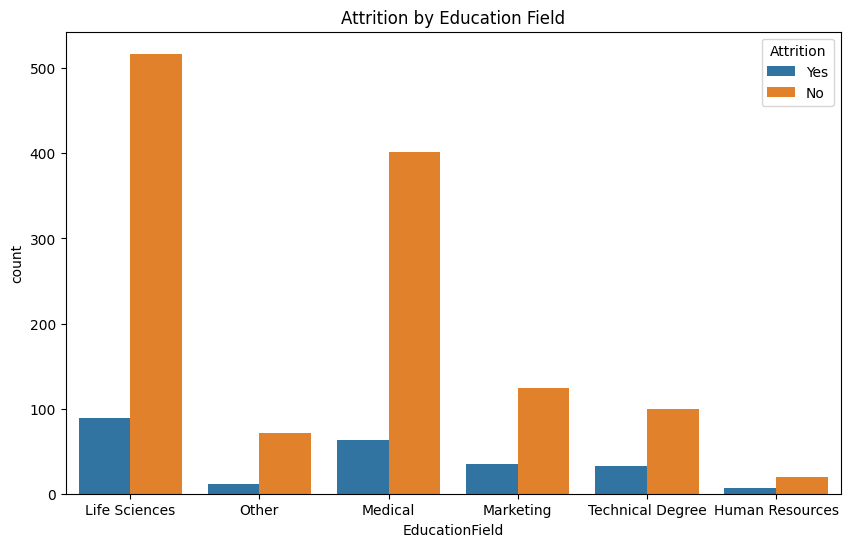

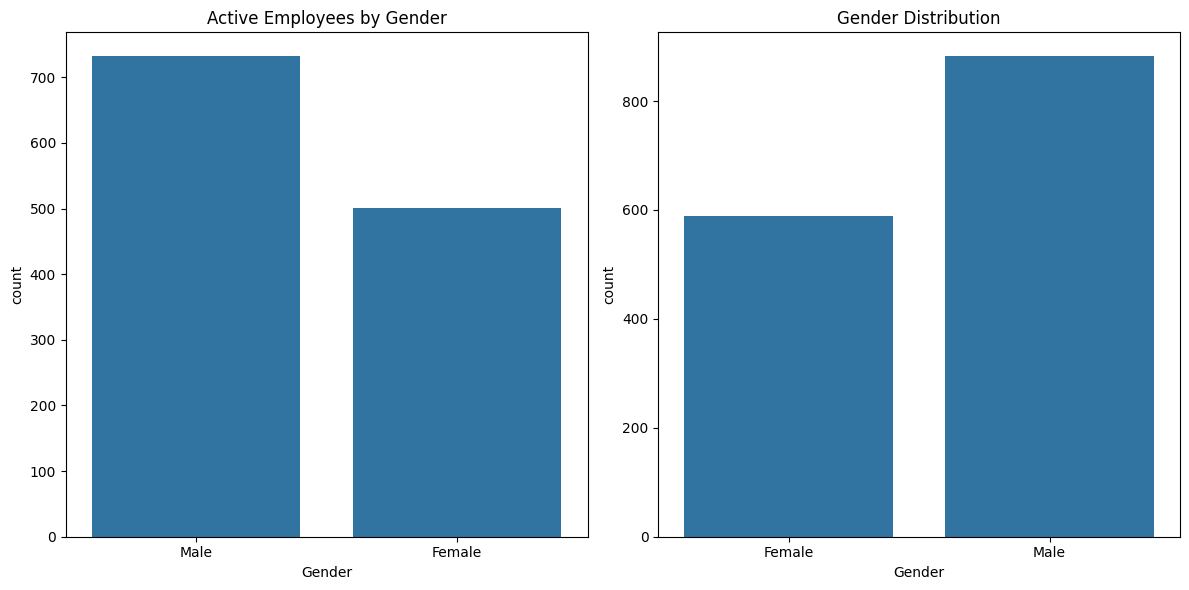

In [ ]:
# Attrition by Education Field
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EducationField', hue='Attrition')
plt.title('Attrition by Education Field')
plt.show()

# Active Employees and Gender Distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df[df['Attrition'] == 'No'], x='Gender')
plt.title('Active Employees by Gender')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

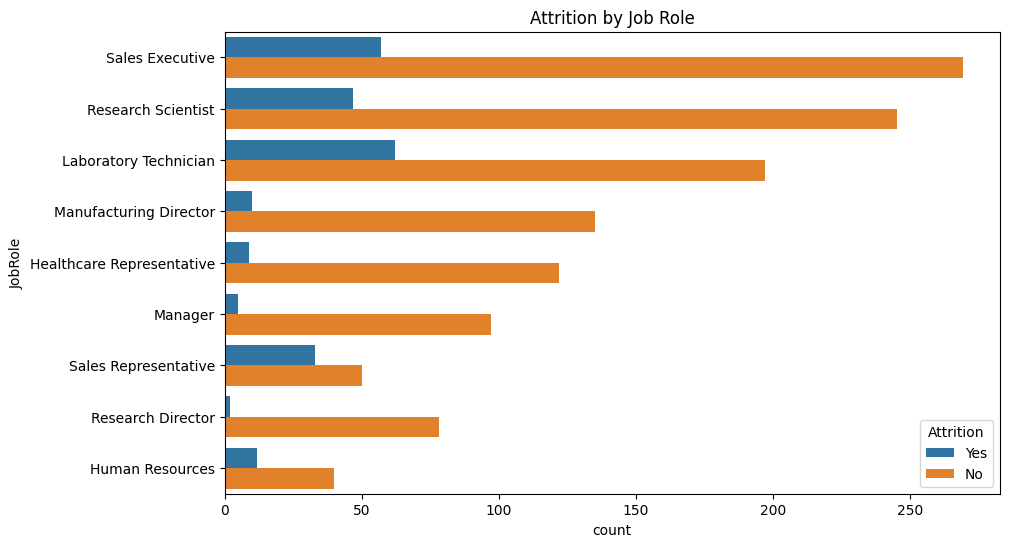

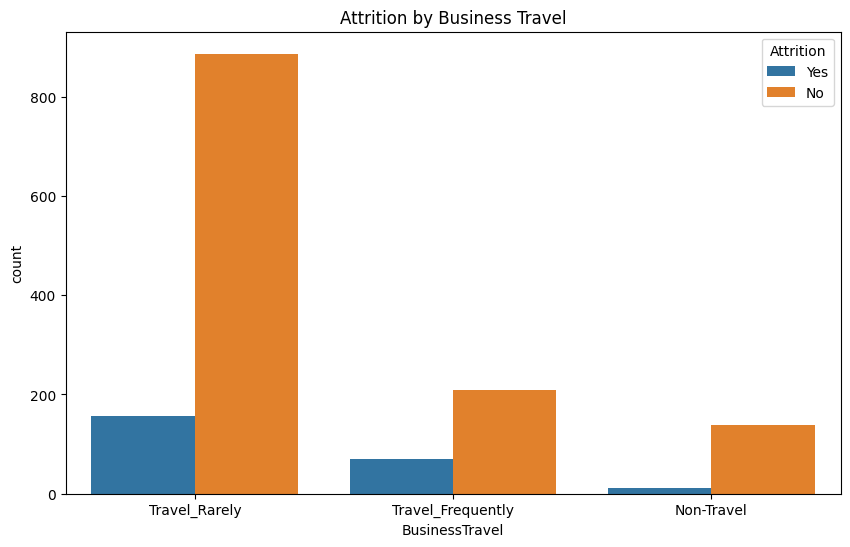

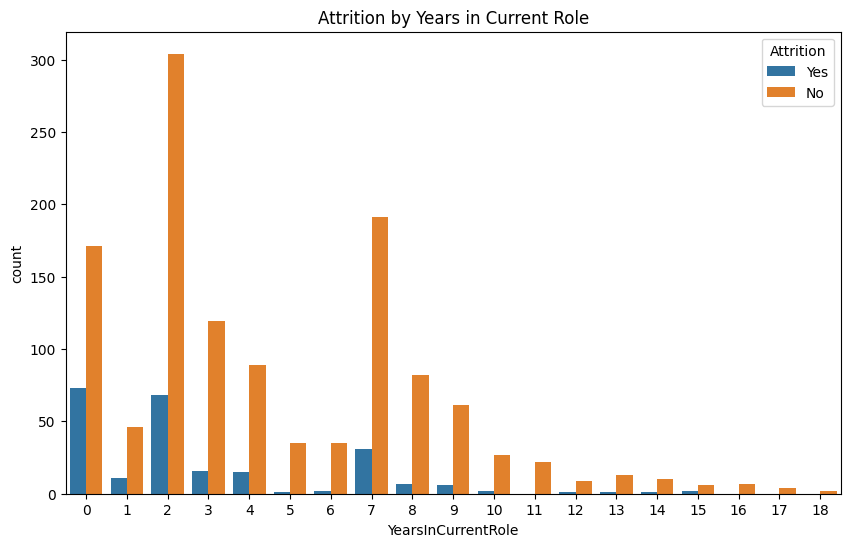

In [ ]:
# Attrition by Job Role
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='JobRole', hue='Attrition')
plt.title('Attrition by Job Role')
plt.show()

# Attrition by Business Travel
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition')
plt.title('Attrition by Business Travel')
plt.show()

# Attrition by Years in Current Role
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='YearsInCurrentRole', hue='Attrition')
plt.title('Attrition by Years in Current Role')
plt.show()

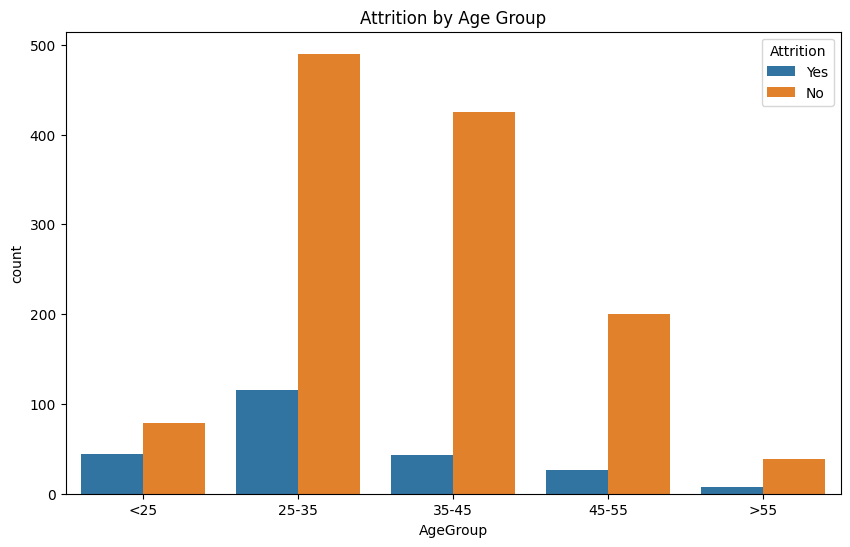

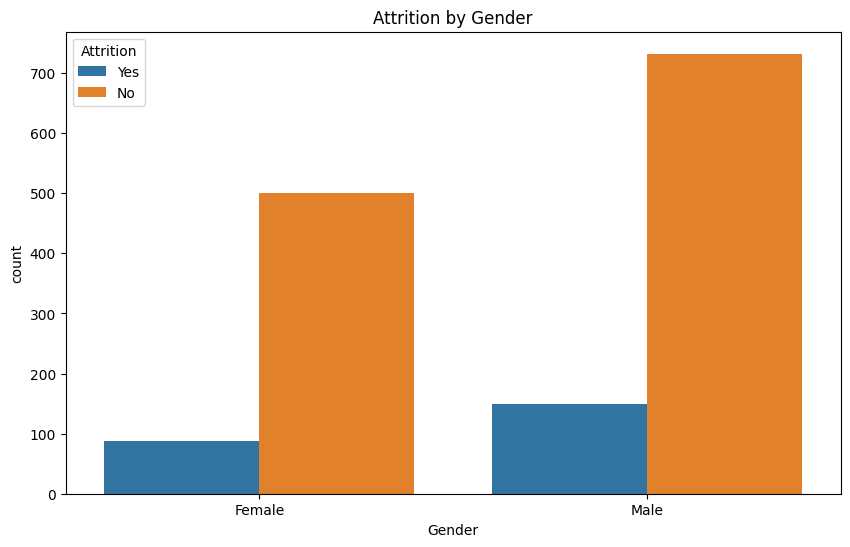

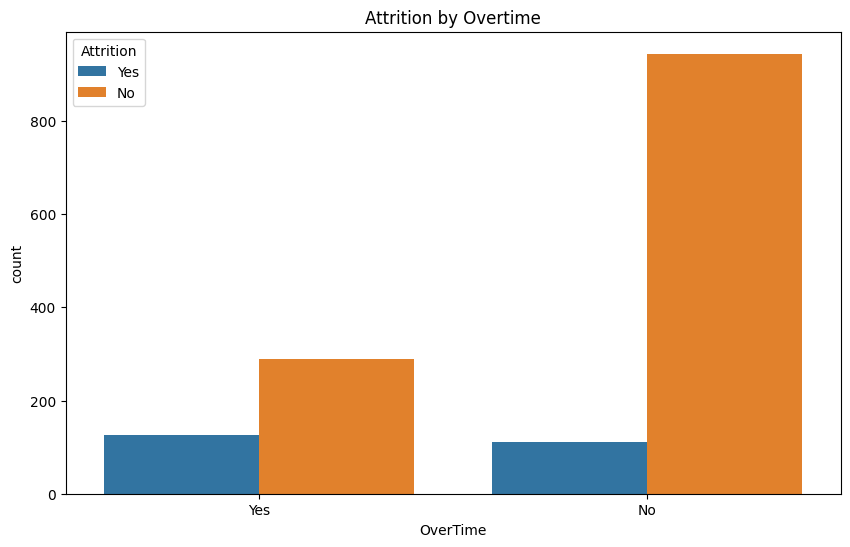

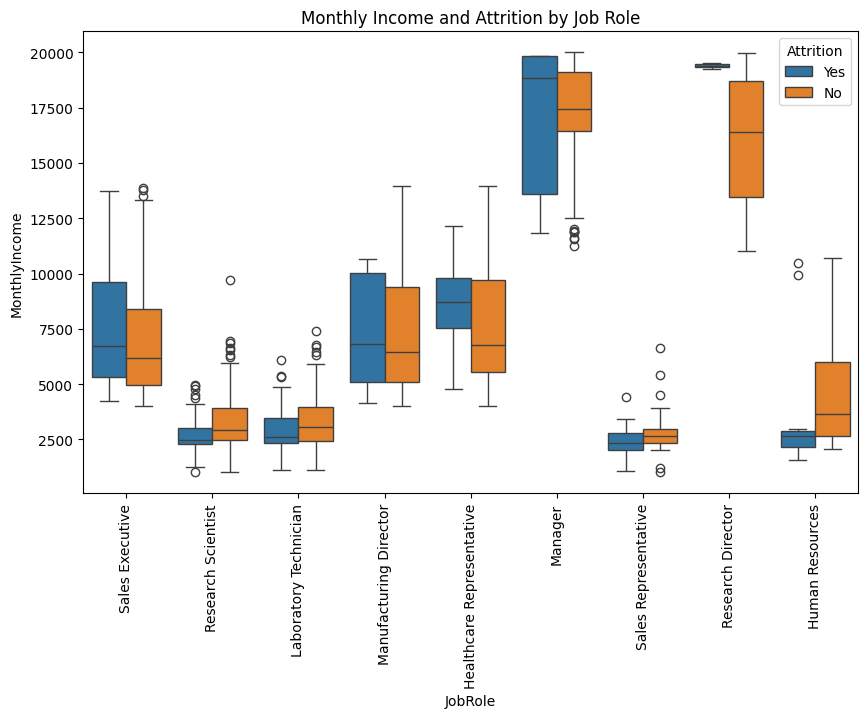

In [ ]:
# Attrition by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', hue='Attrition')
plt.title('Attrition by Age Group')
plt.show()

# Attrition by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.show()

# Attrition by Overtime
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('Attrition by Overtime')
plt.show()

# Monthly Income and Attrition by Job Role
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobRole', y='MonthlyIncome', hue='Attrition')
plt.title('Monthly Income and Attrition by Job Role')
plt.xticks(rotation=90)
plt.show()

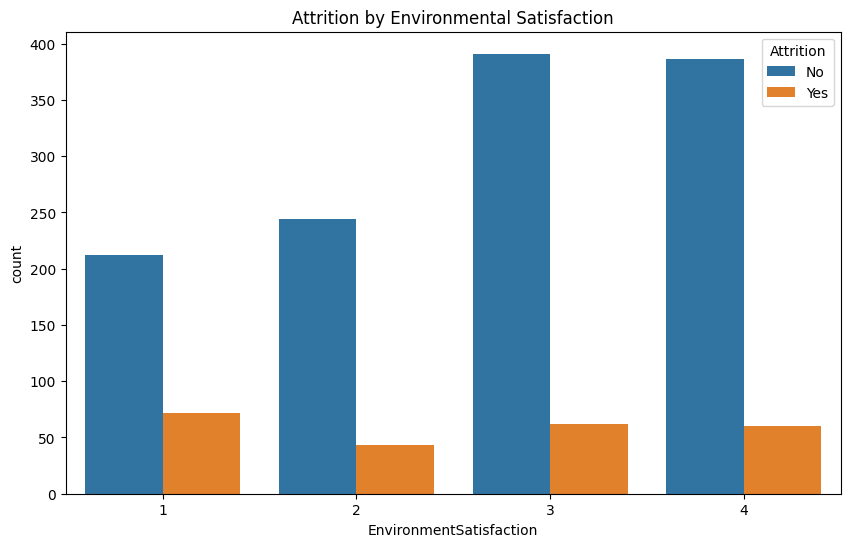

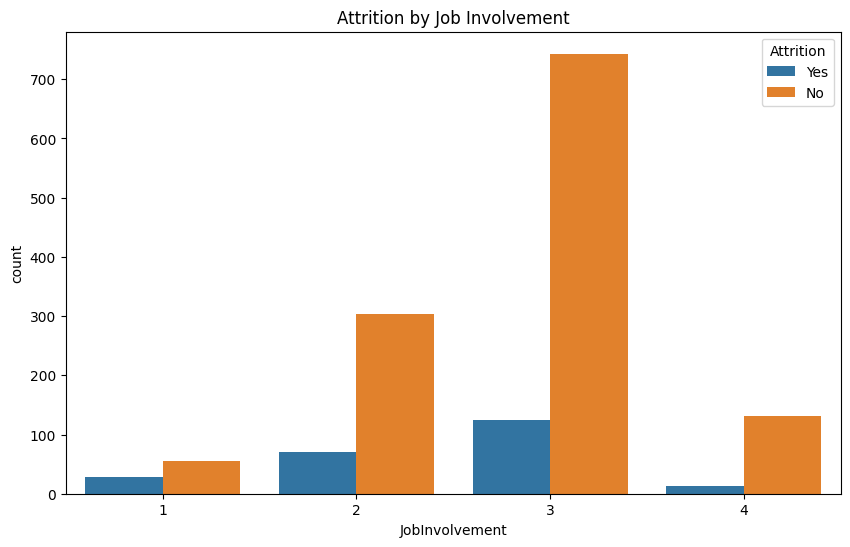

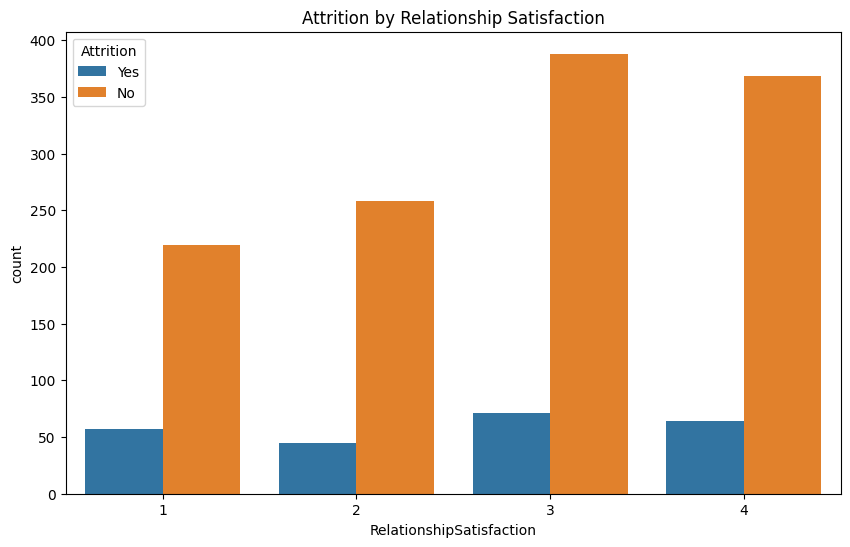

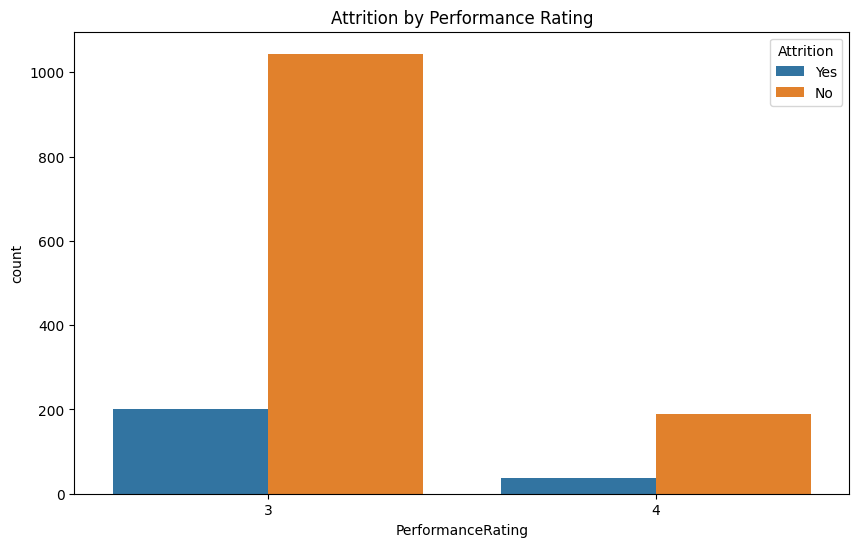

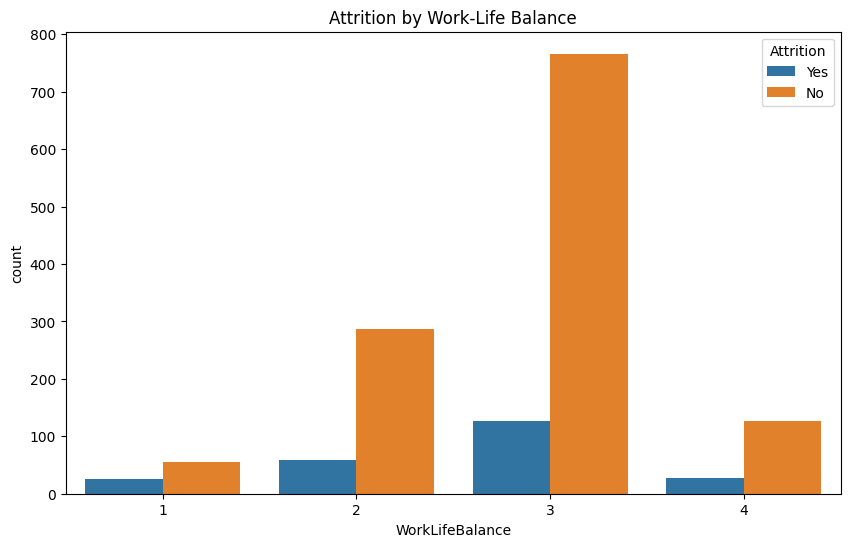

In [ ]:
# Attrition by Environmental Satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition')
plt.title('Attrition by Environmental Satisfaction')
plt.show()

# Attrition by Job Involvement
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobInvolvement', hue='Attrition')
plt.title('Attrition by Job Involvement')
plt.show()

# Attrition by Relationship Satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RelationshipSatisfaction', hue='Attrition')
plt.title('Attrition by Relationship Satisfaction')
plt.show()

# Attrition by Performance Rating
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PerformanceRating', hue='Attrition')
plt.title('Attrition by Performance Rating')
plt.show()

# Attrition by Work-Life Balance
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title('Attrition by Work-Life Balance')
plt.show()